In [1]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt
import cmocean
import itertools

In [2]:
climyrs=[1993,2023]
qtile=0.90
detr=True
#smoothClim=True
smoothTrend=True
meth=method
win=halfwin
qtvar='qt1'
delt=15
jj=60
p1=[215,216,80-60,81-60]

In [3]:
ilead=0
detr=True
smoothedClim=False
smoothedTrend=False
smoothmethod=None
window=1
lmax=215

In [4]:
    def getind(i0):
        if i0>=1 and i0<=10:
            return [i0-1,i0,i0+1]
        elif i0==0:
            return [11,0,1]
        elif i0==11:
            return [10,11,0]
    def leadbounds(l0,lmax,delt):
        return max(0,l0-delt), min(lmax,l0+delt+1)

In [5]:
    if detr:
        flist=[fnameCanESMAnomDetrByLead(workdir, climyrs[0],climyrs[-1],il,jj,smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    else:
        flist=[fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], il, jj,smoothClim=smoothedClim,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    fqout=fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile, detr, 
                               smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window,delt=delt)

In [6]:
ff=xr.open_mfdataset(flist,combine='nested',concat_dim=['leadtime'],parallel=True,decode_times=False)
fc=ff.sst_an.coarsen(reftime=12,boundary='pad').construct(reftime=('year','month'))
fc=fc.chunk({'lat':10,'lon':10})
sh=fc.shape
ql1=np.nan*np.ones((12,sh[-2],sh[-1]))
ql2=np.nan*np.ones((12,sh[-2],sh[-1]))

In [7]:
fc

<xarray.DataArray 'sst_an' (leadtime: 16, year: 32, month: 12, r: 20, lat: 60,
                            lon: 360)> Size: 21GB
dask.array<rechunk-merge, shape=(16, 32, 12, 20, 60, 360), dtype=float64, chunksize=(1, 31, 12, 20, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 480B -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * leadtime  (leadtime) float64 128B 15.0 39.0 63.0 87.0 ... 327.0 351.0 375.0
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    reftime   (year, month) float64 3kB dask.array<chunksize=(32, 12), meta=np.ndarray>
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Dimensions without coordinates: year, month

In [8]:
ff

<xarray.Dataset> Size: 21GB
Dimensions:   (leadtime: 16, reftime: 378, r: 20, lat: 60, lon: 360)
Coordinates:
  * lat       (lat) float64 480B -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * leadtime  (leadtime) float64 128B 15.0 39.0 63.0 87.0 ... 327.0 351.0 375.0
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    sst_an    (leadtime, reftime, r, lat, lon) float64 21GB dask.array<chunksize=(1, 378, 20, 60, 360), meta=np.ndarray>

In [9]:
ffsel=ff.sst_an.isel(lat=20,lon=215)
ffsel

<xarray.DataArray 'sst_an' (leadtime: 16, reftime: 378, r: 20)> Size: 968kB
dask.array<getitem, shape=(16, 378, 20), dtype=float64, chunksize=(1, 378, 20), chunktype=numpy.ndarray>
Coordinates:
    lat       float64 8B -9.5
  * leadtime  (leadtime) float64 128B 15.0 39.0 63.0 87.0 ... 327.0 351.0 375.0
    lon       float64 8B 215.5
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [10]:
np.argwhere(np.isnan(ffsel.values))

array([], shape=(0, 3), dtype=int64)

In [11]:
fcsel=fc.isel(lat=20,lon=215)
fcsel

<xarray.DataArray 'sst_an' (leadtime: 16, year: 32, month: 12, r: 20)> Size: 983kB
dask.array<getitem, shape=(16, 32, 12, 20), dtype=float64, chunksize=(1, 31, 12, 20), chunktype=numpy.ndarray>
Coordinates:
    lat       float64 8B -9.5
  * leadtime  (leadtime) float64 128B 15.0 39.0 63.0 87.0 ... 327.0 351.0 375.0
    lon       float64 8B 215.5
    reftime   (year, month) float64 3kB dask.array<chunksize=(32, 12), meta=np.ndarray>
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Dimensions without coordinates: year, month

In [12]:
blanks=np.argwhere(np.isnan(fcsel.values))
blanks

array([[ 0, 31,  6,  0],
       [ 0, 31,  6,  1],
       [ 0, 31,  6,  2],
       ...,
       [15, 31, 11, 17],
       [15, 31, 11, 18],
       [15, 31, 11, 19]], shape=(1920, 4))

In [13]:
np.unique(blanks[:,0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [14]:
np.unique(blanks[:,1])

array([31])

In [15]:
np.unique(blanks[:,2])

array([ 6,  7,  8,  9, 10, 11])

In [16]:
np.unique(blanks[:,3])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [17]:
for ii in range(0,12):
    pool1=fc.isel(month=ii).data.reshape((sh[0]*sh[1]*sh[3],sh[4],sh[5])).rechunk((-1,10,10))
    ql1[ii,...]=da.apply_along_axis(np.quantile,0,pool1,qtile).compute() # need nanquantile because incomplete years are padded

In [18]:
ql1[:,20,215]

array([0.67843991, 0.78805277, 0.79264716, 0.70047091, 0.65099621,
       0.63786639,        nan,        nan,        nan,        nan,
              nan,        nan])

In [19]:
fqout

'/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/byLeadDetrIndiv2/qtileDetrByLead_cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_L000_delt15_j060_q0_90_ocean_1d_surface_tso.nc'

In [20]:
test=xr.open_dataset(fqout)
test

<xarray.Dataset> Size: 4MB
Dimensions:  (month: 12, lat: 60, lon: 360)
Coordinates:
  * lat      (lat) float64 480B -29.5 -28.5 -27.5 -26.5 ... 26.5 27.5 28.5 29.5
  * lon      (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * month    (month) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    qt1      (month, lat, lon) float64 2MB ...
    qt2      (month, lat, lon) float64 2MB ...

In [21]:
testsel=test.qt1.isel(lat=20,lon=215)

In [22]:
testsel.values

array([0.68297743, 0.76791009, 0.77499155, 0.70675561, 0.65368557,
       0.63473756, 0.42272852, 0.41170614, 0.54910214, 0.65043726,
       0.66288646, 0.76920596])

In [11]:
ql1.shape

(12, 60, 360)

In [13]:
ii=6
pool1=fc.isel(month=ii).data.reshape((sh[0]*sh[1]*sh[3],sh[4],sh[5])).rechunk((-1,10,10))

In [14]:
pool1.shape

(10240, 60, 360)

In [21]:
temp=pool1[:,20,215].compute()

In [22]:
temp

array([0.32924214, 0.34267751, 0.3437914 , ...,        nan,        nan,
              nan], shape=(10240,))

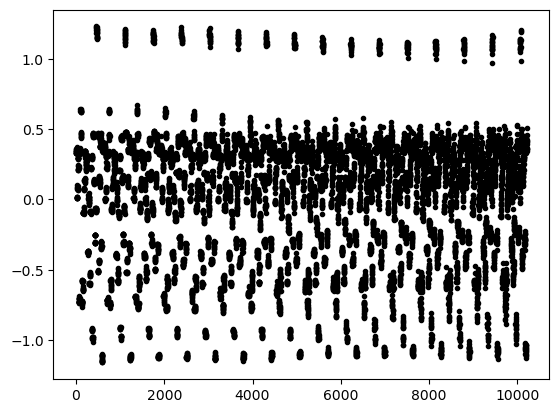

In [23]:
plt.plot(np.arange(0,10240),temp,'k.')

In [32]:
temp2=temp.copy()
temp2[np.isnan(temp2)]=0

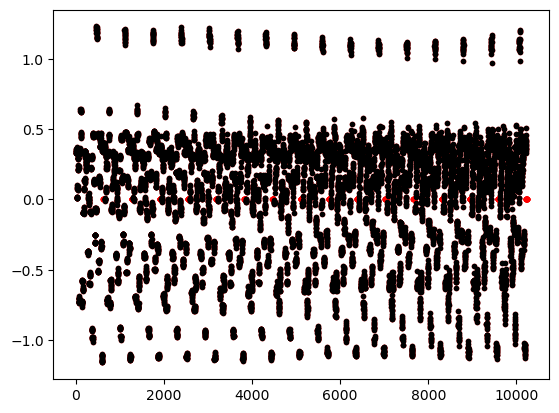

In [33]:
plt.plot(np.arange(0,10240),temp2,'r.')
plt.plot(np.arange(0,10240),temp,'k.')

<xarray.DataArray 'sst_an' (leadtime: 16, reftime: 378, r: 20)> Size: 968kB
dask.array<getitem, shape=(16, 378, 20), dtype=float64, chunksize=(1, 378, 20), chunktype=numpy.ndarray>
Coordinates:
    lat       float64 8B -9.5
  * leadtime  (leadtime) float64 128B 15.0 39.0 63.0 87.0 ... 327.0 351.0 375.0
    lon       float64 8B 215.5
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

array([], shape=(0, 3), dtype=int64)

In [ ]:
    print(fqout,flush=True)
    dsqt=xr.Dataset(data_vars={'qt1':(['month','lat','lon'],ql1,{'long_name':f"{100*qtile}th percentile value"}),},
                               # 'qt2':(['month','lat','lon'],ql2,{'long_name':f"{100*qtile}th percentile value"}),},
                   coords={'month':np.arange(0,12),
                           'lat':ff.lat,
                           'lon':ff.lon})
    dsqt.to_netcdf(fqout,mode='w')
    del dsqt; del fc; del ql1; del ql2; del pool1; #del pool2;
    ff.close()

In [ ]:
def calc_quantile_CanESM30(climyrs,ilead,jj,qtile,detr=True,smoothedClim=False,smoothedTrend=False,smoothmethod=None,window=1,delt=0):
    lmax=215
    def getind(i0):
        if i0>=1 and i0<=10:
            return [i0-1,i0,i0+1]
        elif i0==0:
            return [11,0,1]
        elif i0==11:
            return [10,11,0]
    def leadbounds(l0,lmax,delt):
        return max(0,l0-delt), min(lmax,l0+delt+1)
    if detr:
        flist=[fnameCanESMAnomDetrByLead(workdir, climyrs[0],climyrs[-1],il,jj,smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    else:
        flist=[fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], il, jj,smoothClim=smoothedClim,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    fqout=fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile, detr, 
                               smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window,delt=delt)
    if os.path.exists(fqout): return
    print(flist,flush=True)
    ff=xr.open_mfdataset(flist,combine='nested',concat_dim=['leadtime'],parallel=True,decode_times=False)
    fc=ff.sst_an.coarsen(reftime=12,boundary='pad').construct(reftime=('year','month'))
    fc=fc.chunk({'lat':10,'lon':10})
    sh=fc.shape
    ql1=np.nan*np.ones((12,sh[-2],sh[-1]))
    ql2=np.nan*np.ones((12,sh[-2],sh[-1]))
    for ii in range(0,12):
        if delt<20:
            pool1=fc.isel(month=ii).data.reshape((sh[0]*sh[1]*sh[3],sh[4],sh[5])).rechunk((-1,10,10))
            ql1[ii,...]=da.apply_along_axis(np.quantile,0,pool1,qtile).compute()
            #pool2=fc.sel(month=getind(ii)).data.reshape((sh[0]*sh[1]*3*sh[3],sh[4],sh[5])).rechunk((-1,10,10))
            #ql2[ii,...]=da.apply_along_axis(np.quantile,0,pool2,qtile).compute()
        else:
            gr=20
            for ij in range(0,int(np.ceil(sh[-2]/gr))):
                pool1=fc.isel(month=ii,lat=slice(ij*gr,(ij+1)*gr)).data.reshape((sh[0]*sh[1]*sh[3],gr,sh[5]))
                ql1[ii,ij*gr:(ij+1)*gr,:]=da.apply_along_axis(np.quantile,0,pool1,qtile).compute()
    print(fqout,flush=True)
    dsqt=xr.Dataset(data_vars={'qt1':(['month','lat','lon'],ql1,{'long_name':f"{100*qtile}th percentile value"}),},
                               # 'qt2':(['month','lat','lon'],ql2,{'long_name':f"{100*qtile}th percentile value"}),},
                   coords={'month':np.arange(0,12),
                           'lat':ff.lat,
                           'lon':ff.lon})
    dsqt.to_netcdf(fqout,mode='w')
    del dsqt; del fc; del ql1; del ql2; del pool1; #del pool2;
    ff.close()
    return